In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("../datasets/Mall_Customers.csv")

In [62]:
X = df.drop(columns=['CustomerID', 'Genre', 'Age'])

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
print("Prime 5 righe dell'array scalato:\n",X_scaled[:5])
print("\nLe due colonne di riferimento sono:", X.columns.tolist())

Prime 5 righe dell'array scalato:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]

Le due colonne di riferimento sono: ['Annual Income (k$)', 'Spending Score (1-100)']


In [65]:
silhouette_scores = []
max_silhouette = -1
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > max_silhouette:
        max_silhouette = silhouette_avg
        best_k_silhouette = k



In [66]:
inertias = []
K = range(2, 11) 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

best_k_inertia = 5 #dopo confronto con silhouette


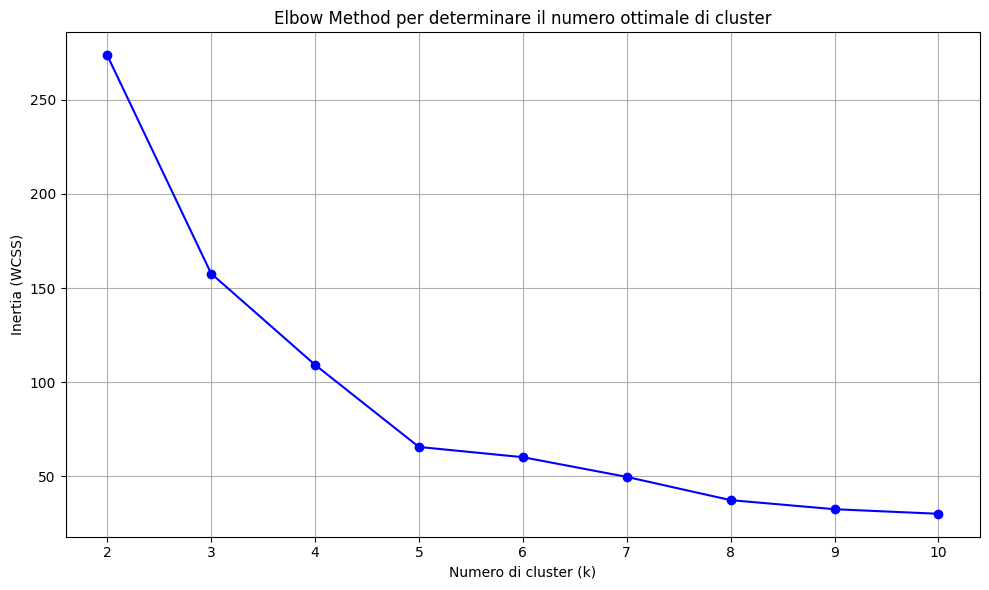

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bo-')
plt.title('Elbow Method per determinare il numero ottimale di cluster')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.tight_layout()
plt.show()

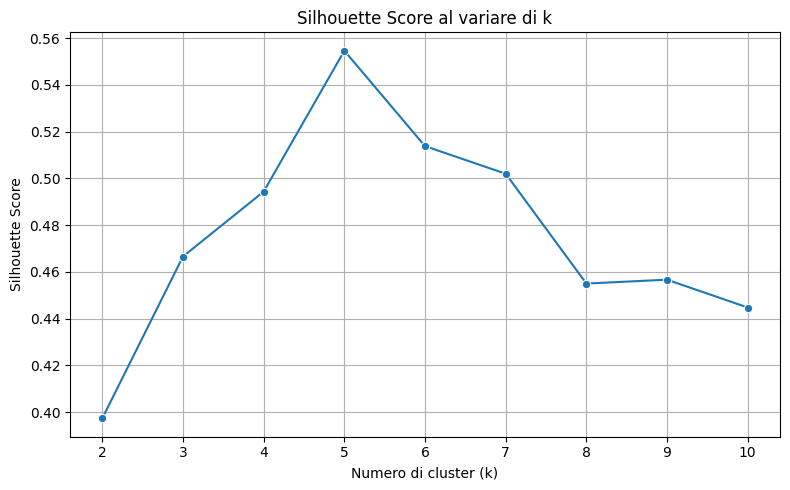

In [68]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(K), y=silhouette_scores, marker='o')
plt.title("Silhouette Score al variare di k")
plt.xlabel("Numero di cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

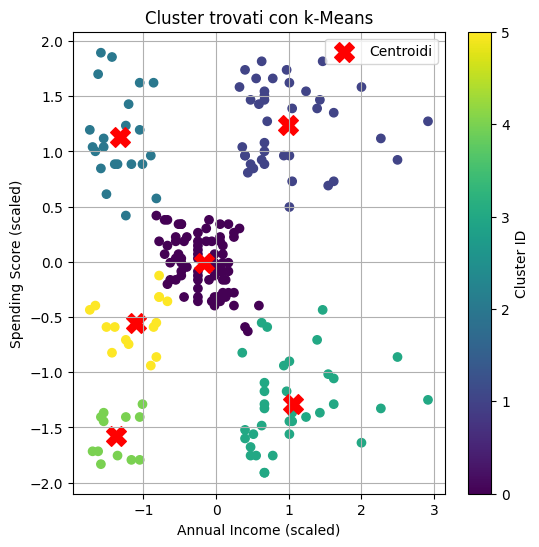

In [73]:
best_kmeans = KMeans(n_clusters=best_k_silhouette+1, random_state=42)
labels = best_kmeans.fit_predict(X_scaled)

# Visualizzazione con i cluster trovati
plt.figure(figsize=(6, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroidi')
plt.colorbar(scatter, label='Cluster ID')
plt.title("Cluster trovati con k-Means")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.grid(True)
plt.show()

**Interpretazione del clustering Effettuato**

Dato il clustering effettuato, abbiamo suddiviso seguendo il metodo individuando il miglior punteggio di Silhouette aggiungendo un cluster per individuare il limite logico, metodo confermato anche dal grafico della Silhouette dato che la perdita di punteggio di Silhouette è minore aumentando di 1 il numero di cluster che decrescendo.
Il calcolo dell'Inertia è stato effettuato per confermare che quel punto può essere un ottimo candidato per la nostra analisi.
Nel dettaglio dei 6 cluster risultanti e analizzando il grafico, possiamo individuare:
- cluster verde scuro (n .3): clienti con alto stipendio ma basso punteggio di spesa
- cluster giallo (n. 5): clienti con basso stipendio ma punteggio di spesa medio
- cluster verde chiaro (n.4): clienti con basso stipendio e basso punteggio di spesa
- cluster viola (n. 0): cluster centrale, con clienti con stipendio medio e punteggio di spesa medio
- cluster indaco (n.2): clienti con stipendio basso ma alto punteggio di spesa
- cluster blu (n.1): clienti con stipendio alto e alto punteggio di spesa

La strategia risultante e ottimale potrebbe essere cercare di spingere i clienti del cluster viola più sulla destra, aumentando il punteggio di spesa con strategie di marketing mirate.